# NUR Turorial 2

## 1 One - dimensionsal interpolation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# A

In [2]:
#A
class LinearInterpol(): 
    def __init__(self,x,y) -> None:
        self.x = x 
        self.y= y

    def find_closest_lowest_index(self, x) -> int:
        slicing_list = self.x 
        index_list = [index for index in range(0,len(self.x))]
        list_len= len(slicing_list)
        while list_len > 1: 
            middle_index = int(np.math.floor(list_len/2))
            #update condition
            if x > slicing_list[middle_index]:
                slicing_list = slicing_list[middle_index:]
                index_list = index_list[middle_index:]
            else: 
                slicing_list = slicing_list[:middle_index]
                index_list = index_list[:middle_index]
            list_len = len(slicing_list)
        return index_list[0]

    def interpolate(self, x) -> float:
        neighbours = self.find_closest_lowest_index(x)
        y_left = self.y[neighbours]
        y_right = self.y[neighbours+1]
        x_left =  self.x[neighbours]
        x_right = self.x[neighbours+1]
        dydx = (y_right-y_left) / (x_right-x_left)
        interpolated_value = y_left + dydx * (x-x_left)
        return interpolated_value


In [3]:
#create data and initiate linear interpol
x = np.linspace(0,2*np.pi, 12)
y = np.sin(x)
interpol = LinearInterpol(x,y)


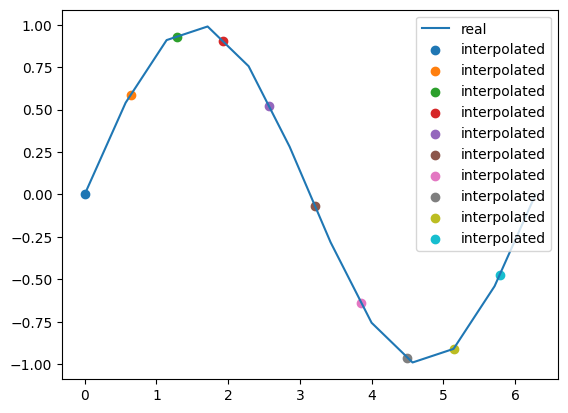

In [6]:
plt.plot(x,y, label="real")
for i in np.linspace(0,2*np.pi-0.5, 10):
    plt.scatter(i, interpol.interpolate(i), label="interpolated")

plt.legend()

## B

using nevilles algorithm calculate higher order interpolations

In [16]:
#test

print(list(range(0,1)))

[0]


In [23]:
class nevilleinterpol(): 
    def __init__(self,x,y) -> None:
        self.x = x 
        self.y= y
        

    def neighbours(self, x, M) -> int:
        slicing_list = self.x 
        index_list = [index for index in range(0,len(self.x))]
        list_len= len(slicing_list)
        while list_len > 1: 
            middle_index = int(np.math.floor(list_len/2))
            #update condition
            if x > slicing_list[middle_index]:
                slicing_list = slicing_list[middle_index:]
                index_list = index_list[middle_index:]
            else: 
                slicing_list = slicing_list[:middle_index]
                index_list = index_list[:middle_index]
            list_len = len(slicing_list)

            #selecting points M around the middle value
        return list(range(index_list[0], index_list[0]+M))
        

    def interpolate(self, x, M=1) -> float:
        neighbours = self.find_closest_lowest_index(x,M)
        y_left = self.y[neighbours]
        y_right = self.y[neighbours+1]
        x_left =  self.x[neighbours]
        x_right = self.x[neighbours+1]
        dydx = (y_right-y_left) / (x_right-x_left)
        interpolated_value = y_left + dydx * (x-x_left)
        return interpolated_value

In [24]:
#create data and initiate linear interpol
x = np.linspace(0,2*np.pi, 12)
y = np.sin(x)
interpol = nevilleinterpol(x,y)

In [27]:
interpol.neighbours(1.3, 3)

[2, 3, 4]

0 1
0 1
0 1


TypeError: can only concatenate list (not "int") to list

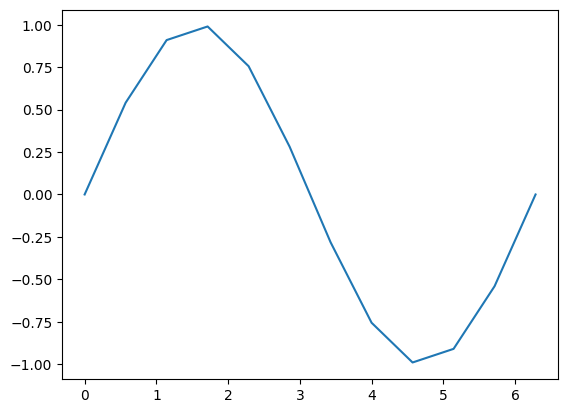

In [12]:
plt.plot(x,y, label="real")
for i in np.linspace(0,2*np.pi-0.5, 10):
    plt.scatter(i, interpol.interpolate(i), label="interpolated")

plt.legend()